##### This notebook evaluates the results of training a logistic regression model on the theses in one topic and testing on the other topics #####

##### Resulting accuracies for Swedish #####

| Trained on <br />Tested on | Humaniora  <br /><br />  | Architecture <br /><br />  | Economy <br /><br />  | Natural Science <br /><br />   
| --- | --- | --- | --- | --- |
| Humaniora | 1.0 | 0.65 | 0.66 | 0.59
| Architecture   | 0.58 | 1.0 | 0.62 | 0.57
| Economy | 0.63 | 0.67 | 1.0 | 0.61
| Natural Science | 0.54 | 0.67 | 0.78 | 0.99

##### Resulting accuracies for English #####

| Trained on<br /> Tested on | Humaniora  <br /><br />  | Architecture <br /><br />  | Economy <br /><br />  | Natural Science <br /><br />   
| --- | --- | --- | --- | --- |
| Humaniora | 1.0 | 0.57 | 0.61 | 0.59
| Architecture   | 0.60 | 0.91 | 0.59 | 0.58
| Economy | 0.57 | 0.60 | 1.0 | 0.62
| Natural Science | 0.57 | 0.61 | 0.59 | 0.98



In [2]:
# Divide the departments into four main topics

humaniora      = ['Institutionen för filosofi, lingvistik och vetenskapsteori','Institutionen för litteratur, idéhistoria och religion','Institutionen för språk och litteraturer','Institutionen för svenska språket']
arkitektur     = ['Institutionen för arkitektur och samhällsbyggnadsteknik']
ekonomi        = ['Företagsekonomiska institutionen']
naturvetenskap = ['Institutionen för biologi och bioteknik','Institutionen för fysik','Institutionen för kemi och kemiteknik','Institutionen för rymd- och geovetenskap']


In [2]:
import pandas as pd
freqs = pd.read_csv("../frequencies_swe.csv")
df    = pd.read_csv("../df_swedish_downsampled.csv")

freqs_eng = pd.read_csv("../frequencies_eng.csv")
df_eng    = pd.read_csv("../df_english_downsampled.csv")



In [3]:
freqs.drop_duplicates(subset=['id'],inplace=True)
freqs_eng.drop_duplicates(subset=['id'],inplace=True)
ids     = freqs['id'].values
ids_eng = freqs_eng['id'].values


In [4]:
# Drop junk columns
freqs_eng = freqs_eng.drop(['Unnamed: 0' , 'Unnamed: 1'], axis=1)
freqs = freqs.drop(['Unnamed: 0'], axis=1)

In [5]:
# Example row of English frequency dataframe
freqs_eng[0:1]

,RB,WRB,UH,NP,MD,VBG,PP,EX,NPS,IN,...,thyself,theirselves,yon,whatnot,whereto,aught,wherewithal,theirself,nought,idem
0,0.01251,0.001564,0.0,0.103206,0.005082,0.0,0.007428,0.000391,0.000391,0.070758,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# Example row of Swedish frequency dataframe
freqs[0:1]

,NN.UTR.PLU.DEF.GEN,PS.UTR+NEU.SIN+PLU.DEF,NN.UTR.PLU.IND.GEN,PC.PRF.UTR+NEU.SIN.DEF.GEN,NN.UTR.SIN.IND.GEN,PN.UTR.SIN.DEF.OBJ,PAD,VB.PRS.AKT,PL,JJ.POS.UTR+NEU.SIN.DEF.NOM,...,densamme,sej,dej,sverige,dens,göteborg,envar,ingens,dets,nåra
0,0.000661,0.00269,0.00269,0.0,0.000189,0.001463,0.032754,0.075845,0.011186,0.004908,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
# Get labels of the theses in the same order as the in the frequency table

from preprocess_inputs import determine_gender, determine_topic

labels_gender = [determine_gender(df[df['id'] == ident]['gender_composition'].values[0]) for ident in ids]
labels_topic  = [determine_topic(df[df['id'] == ident]['department'].values[0]) for ident in ids]

labels_gender_eng = [determine_gender(df_eng[df_eng['id'] == ident]['gender_composition'].values[0]) for ident in ids_eng]
labels_topic_eng  = [determine_topic(df_eng[df_eng['id'] == ident]['department'].values[0]) for ident in ids_eng]

In [8]:
# Remove identifier from input
freqs     = freqs.drop(['id'],axis=1)
freqs_eng = freqs_eng.drop(['id'],axis=1)

In [9]:
# Divide input and labels into topics

freqs_by_topic        = [[freqs.iloc[i] for i in range(len(labels_topic)) if labels_topic[i] == j] for j in [0,1,2,3]]
genderlabels_by_topic = [[labels_gender[i] for i in range(len(labels_topic)) if labels_topic[i] == j] for j in [0,1,2,3]]


freqs_by_topic_eng        = [[freqs_eng.iloc[i] for i in range(len(labels_topic_eng)) if labels_topic_eng[i] == j] for j in [0,1,2,3]]
genderlabels_by_topic_eng = [[labels_gender_eng[i] for i in range(len(labels_topic_eng)) if labels_topic_eng[i] == j] for j in [0,1,2,3]]


In [10]:
# Add topic column to dataframes

df['topic'] = labels_topic
df_eng['topic'] = labels_topic_eng
df = df.reset_index()
df_eng = df_eng.reset_index()

In [11]:
from preprocess_inputs import scale_frequencies
# Standardize inputs for all topics
for i in [0,1,2,3] :
    freqs_by_topic[i]     = scale_frequencies(freqs_by_topic[i])
    freqs_by_topic_eng[i] = scale_frequencies(freqs_by_topic_eng[i])



In [12]:
from sklearn.linear_model import LogisticRegression

def logreg() : 
    return LogisticRegression(solver='saga',penalty = 'l1',max_iter=1000)


In [13]:
logreg_hum = logreg()
logreg_ark = logreg()
logreg_eko = logreg()
logreg_nat = logreg()

In [14]:
logreg_hum_eng = logreg()
logreg_ark_eng = logreg()
logreg_eko_eng = logreg()
logreg_nat_eng = logreg()

In [ ]:

# Fit a logistic regression model on the frequency matrix and gender labels of each topic 
logreg_hum.fit(freqs_by_topic[0],genderlabels_by_topic[0])
logreg_ark.fit(freqs_by_topic[1],genderlabels_by_topic[1])
logreg_eko.fit(freqs_by_topic[2],genderlabels_by_topic[2])
logreg_nat.fit(freqs_by_topic[3],genderlabels_by_topic[3])

In [ ]:
logreg_hum_eng.fit(freqs_by_topic_eng[0],genderlabels_by_topic_eng[0])
logreg_ark_eng.fit(freqs_by_topic_eng[1],genderlabels_by_topic_eng[1])
logreg_eko_eng.fit(freqs_by_topic_eng[2],genderlabels_by_topic_eng[2])
logreg_nat_eng.fit(freqs_by_topic_eng[3],genderlabels_by_topic_eng[3])

In [17]:
from sklearn.metrics import classification_report

num_to_topic = {0 : "Humaniora",
        1 : "Arkitektur",
        2 : "Ekonomi",
        3 : "Naturvetenskap"}

def print_report(model,kind,genders,frequencies) :
    
    for i in [0,1,2,3] : 
        print("Model trained on : " + kind)
        print("Tested on: " + num_to_topic[i])
        print(classification_report(genders[i],model.predict(frequencies[i]),labels=[0,1],target_names=['female','male']))
  

In [18]:
print_report(logreg_hum, "Humaniora", genderlabels_by_topic,freqs_by_topic)


Model trained on : Humaniora
Tested on: Humaniora
              precision    recall  f1-score   support

      female       1.00      1.00      1.00       346
        male       1.00      1.00      1.00       346

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692

Model trained on : Humaniora
Tested on: Arkitektur
              precision    recall  f1-score   support

      female       0.58      0.56      0.57       408
        male       0.57      0.59      0.58       408

    accuracy                           0.58       816
   macro avg       0.58      0.58      0.58       816
weighted avg       0.58      0.58      0.58       816

Model trained on : Humaniora
Tested on: Ekonomi
              precision    recall  f1-score   support

      female       0.63      0.63      0.63       814
        male       0.63      0.63      0.63       814

    accuracy                     

In [19]:
print_report(logreg_hum_eng, "Humaniora, English", genderlabels_by_topic_eng,freqs_by_topic_eng)


Model trained on : Humaniora, English
Tested on: Humaniora
              precision    recall  f1-score   support

      female       1.00      1.00      1.00       177
        male       1.00      1.00      1.00       177

    accuracy                           1.00       354
   macro avg       1.00      1.00      1.00       354
weighted avg       1.00      1.00      1.00       354

Model trained on : Humaniora, English
Tested on: Arkitektur
              precision    recall  f1-score   support

      female       0.60      0.60      0.60       847
        male       0.60      0.60      0.60       847

    accuracy                           0.60      1694
   macro avg       0.60      0.60      0.60      1694
weighted avg       0.60      0.60      0.60      1694

Model trained on : Humaniora, English
Tested on: Ekonomi
              precision    recall  f1-score   support

      female       0.57      0.55      0.56       311
        male       0.56      0.58      0.57       311

    ac

In [20]:
print_report(logreg_ark, "Arkitektur", genderlabels_by_topic,freqs_by_topic)


Model trained on : Arkitektur
Tested on: Humaniora
              precision    recall  f1-score   support

      female       0.65      0.64      0.65       346
        male       0.65      0.65      0.65       346

    accuracy                           0.65       692
   macro avg       0.65      0.65      0.65       692
weighted avg       0.65      0.65      0.65       692

Model trained on : Arkitektur
Tested on: Arkitektur
              precision    recall  f1-score   support

      female       1.00      1.00      1.00       408
        male       1.00      1.00      1.00       408

    accuracy                           1.00       816
   macro avg       1.00      1.00      1.00       816
weighted avg       1.00      1.00      1.00       816

Model trained on : Arkitektur
Tested on: Ekonomi
              precision    recall  f1-score   support

      female       0.67      0.67      0.67       814
        male       0.67      0.67      0.67       814

    accuracy                  

In [21]:
print_report(logreg_ark_eng, "Arkitektur, English", genderlabels_by_topic_eng,freqs_by_topic_eng)


Model trained on : Arkitektur, English
Tested on: Humaniora
              precision    recall  f1-score   support

      female       0.57      0.61      0.59       177
        male       0.58      0.54      0.56       177

    accuracy                           0.57       354
   macro avg       0.57      0.57      0.57       354
weighted avg       0.57      0.57      0.57       354

Model trained on : Arkitektur, English
Tested on: Arkitektur
              precision    recall  f1-score   support

      female       0.91      0.91      0.91       847
        male       0.91      0.91      0.91       847

    accuracy                           0.91      1694
   macro avg       0.91      0.91      0.91      1694
weighted avg       0.91      0.91      0.91      1694

Model trained on : Arkitektur, English
Tested on: Ekonomi
              precision    recall  f1-score   support

      female       0.60      0.64      0.62       311
        male       0.61      0.57      0.59       311

   

In [22]:
print_report(logreg_eko, "Ekonomi", genderlabels_by_topic,freqs_by_topic)


Model trained on : Ekonomi
Tested on: Humaniora
              precision    recall  f1-score   support

      female       0.66      0.65      0.66       346
        male       0.66      0.67      0.66       346

    accuracy                           0.66       692
   macro avg       0.66      0.66      0.66       692
weighted avg       0.66      0.66      0.66       692

Model trained on : Ekonomi
Tested on: Arkitektur
              precision    recall  f1-score   support

      female       0.61      0.62      0.62       408
        male       0.62      0.61      0.61       408

    accuracy                           0.62       816
   macro avg       0.62      0.62      0.62       816
weighted avg       0.62      0.62      0.62       816

Model trained on : Ekonomi
Tested on: Ekonomi
              precision    recall  f1-score   support

      female       1.00      1.00      1.00       814
        male       1.00      1.00      1.00       814

    accuracy                           

In [23]:
print_report(logreg_eko_eng, "Ekonomi, English", genderlabels_by_topic_eng,freqs_by_topic_eng)


Model trained on : Ekonomi, English
Tested on: Humaniora
              precision    recall  f1-score   support

      female       0.60      0.66      0.63       177
        male       0.62      0.56      0.59       177

    accuracy                           0.61       354
   macro avg       0.61      0.61      0.61       354
weighted avg       0.61      0.61      0.61       354

Model trained on : Ekonomi, English
Tested on: Arkitektur
              precision    recall  f1-score   support

      female       0.59      0.57      0.58       847
        male       0.58      0.60      0.59       847

    accuracy                           0.59      1694
   macro avg       0.59      0.59      0.59      1694
weighted avg       0.59      0.59      0.59      1694

Model trained on : Ekonomi, English
Tested on: Ekonomi
              precision    recall  f1-score   support

      female       1.00      1.00      1.00       311
        male       1.00      1.00      1.00       311

    accuracy

In [24]:
print_report(logreg_nat, "Naturvetenskap", genderlabels_by_topic,freqs_by_topic)


Model trained on : Naturvetenskap
Tested on: Humaniora
              precision    recall  f1-score   support

      female       0.59      0.58      0.59       346
        male       0.59      0.59      0.59       346

    accuracy                           0.59       692
   macro avg       0.59      0.59      0.59       692
weighted avg       0.59      0.59      0.59       692

Model trained on : Naturvetenskap
Tested on: Arkitektur
              precision    recall  f1-score   support

      female       0.56      0.58      0.57       408
        male       0.57      0.55      0.56       408

    accuracy                           0.57       816
   macro avg       0.57      0.57      0.57       816
weighted avg       0.57      0.57      0.57       816

Model trained on : Naturvetenskap
Tested on: Ekonomi
              precision    recall  f1-score   support

      female       0.61      0.62      0.62       814
        male       0.61      0.61      0.61       814

    accuracy      

In [25]:
print_report(logreg_nat_eng, "Naturvetenskap, English", genderlabels_by_topic_eng,freqs_by_topic_eng)


Model trained on : Naturvetenskap, English
Tested on: Humaniora
              precision    recall  f1-score   support

      female       0.60      0.55      0.58       177
        male       0.59      0.63      0.61       177

    accuracy                           0.59       354
   macro avg       0.59      0.59      0.59       354
weighted avg       0.59      0.59      0.59       354

Model trained on : Naturvetenskap, English
Tested on: Arkitektur
              precision    recall  f1-score   support

      female       0.58      0.58      0.58       847
        male       0.58      0.58      0.58       847

    accuracy                           0.58      1694
   macro avg       0.58      0.58      0.58      1694
weighted avg       0.58      0.58      0.58      1694

Model trained on : Naturvetenskap, English
Tested on: Ekonomi
              precision    recall  f1-score   support

      female       0.62      0.59      0.61       311
        male       0.61      0.64      0.63   

In [26]:
from sklearn.metrics import plot_confusion_matrix

from matplotlib import pyplot as plt


def plot_confusion_matrices(kind,model,frequencies,labels) :
    
    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20,5))

    print("Confusion matrices for model trained on: " + kind)
    for i, ax in zip([0,1,2,3], axes.flatten()):
        plot_confusion_matrix(model,frequencies[i], labels[i],ax=ax)
        ax.title.set_text("Tested on: " + num_to_topic[i])



Confusion matrices for model trained on: Humaniora


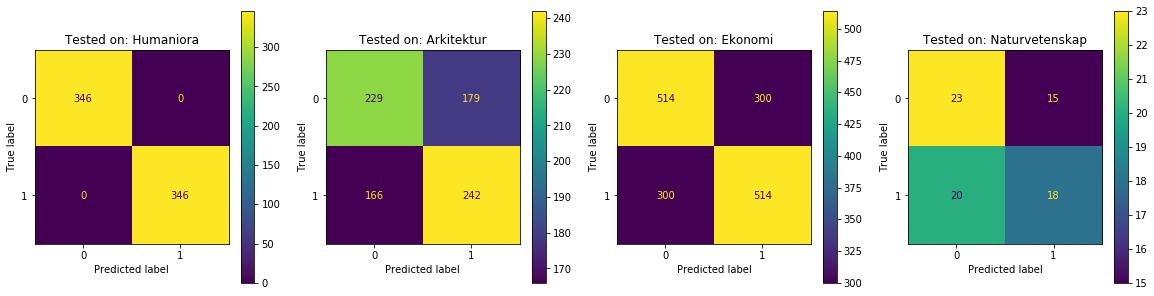

In [27]:
plot_confusion_matrices("Humaniora",logreg_hum,freqs_by_topic,genderlabels_by_topic)


Confusion matrices for model trained on: Arkitektur


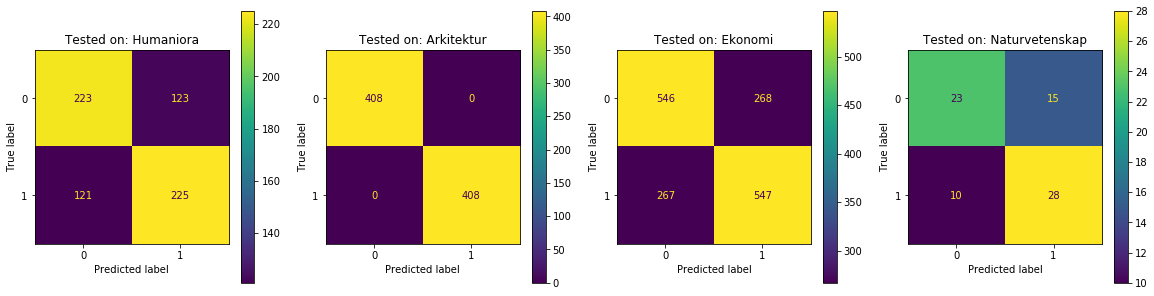

In [28]:
plot_confusion_matrices("Arkitektur",logreg_ark,freqs_by_topic,genderlabels_by_topic)


Confusion matrices for model trained on: Ekonomi


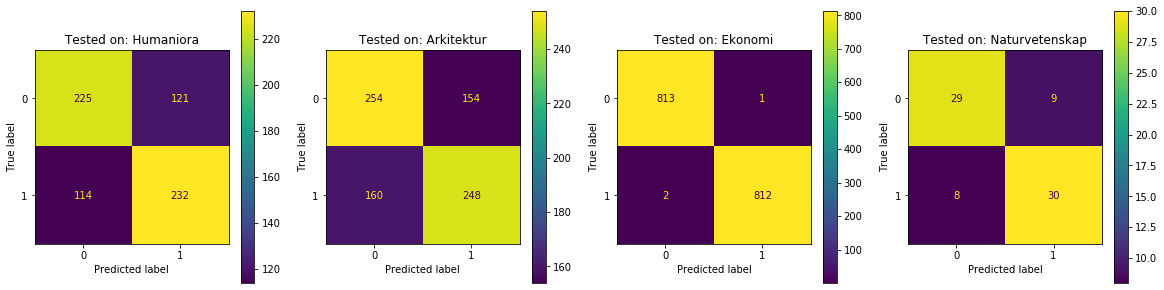

In [29]:
plot_confusion_matrices("Ekonomi",logreg_eko,freqs_by_topic,genderlabels_by_topic)


Confusion matrices for model trained on: Naturvetenskap


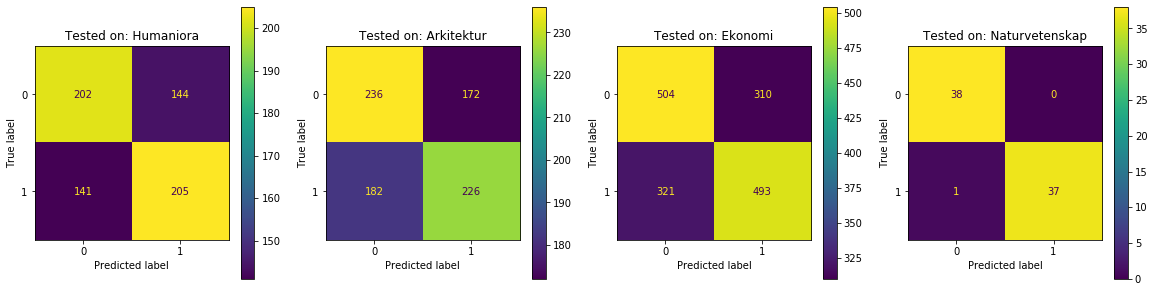

In [30]:
plot_confusion_matrices("Naturvetenskap",logreg_nat,freqs_by_topic,genderlabels_by_topic)

Confusion matrices for model trained on: Humaniora (English)


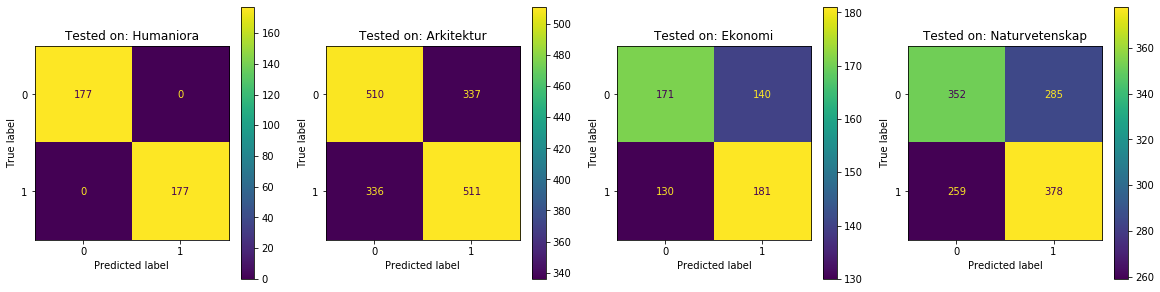

In [31]:
plot_confusion_matrices("Humaniora (English)",logreg_hum_eng,freqs_by_topic_eng,genderlabels_by_topic_eng)


Confusion matrices for model trained on: Arkitektur (English)


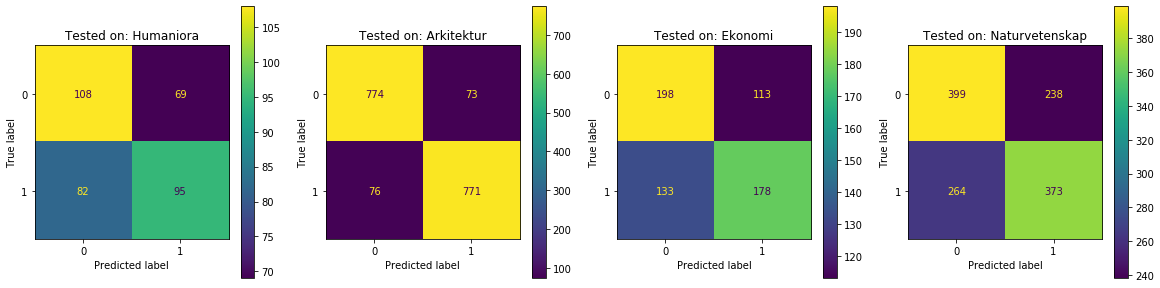

In [32]:
plot_confusion_matrices("Arkitektur (English)",logreg_ark_eng,freqs_by_topic_eng,genderlabels_by_topic_eng)


Confusion matrices for model trained on: Ekonomi (English)


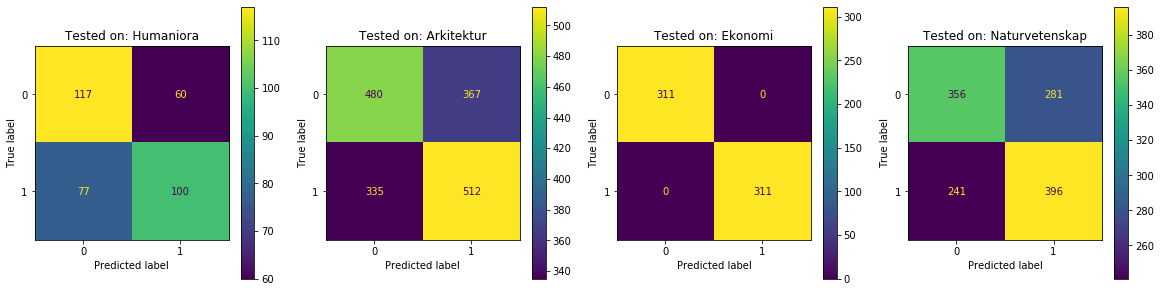

In [33]:
plot_confusion_matrices("Ekonomi (English)",logreg_eko_eng,freqs_by_topic_eng,genderlabels_by_topic_eng)


Confusion matrices for model trained on: Naturvetenskap (English)


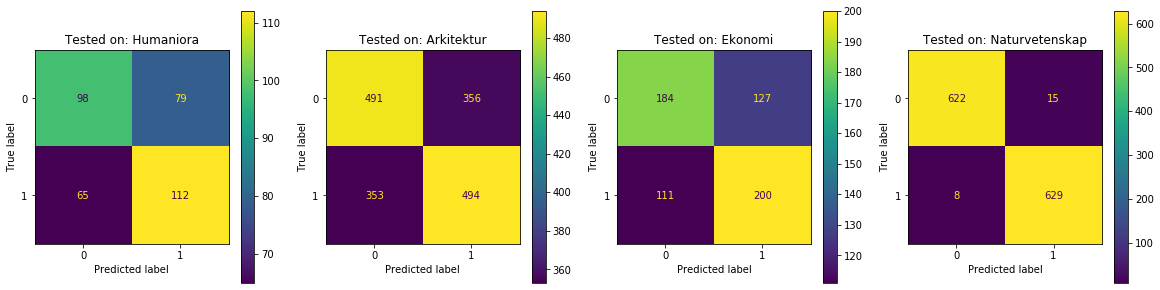

In [34]:
plot_confusion_matrices("Naturvetenskap (English)",logreg_nat_eng,freqs_by_topic_eng,genderlabels_by_topic_eng)
